Columns in dataset:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_

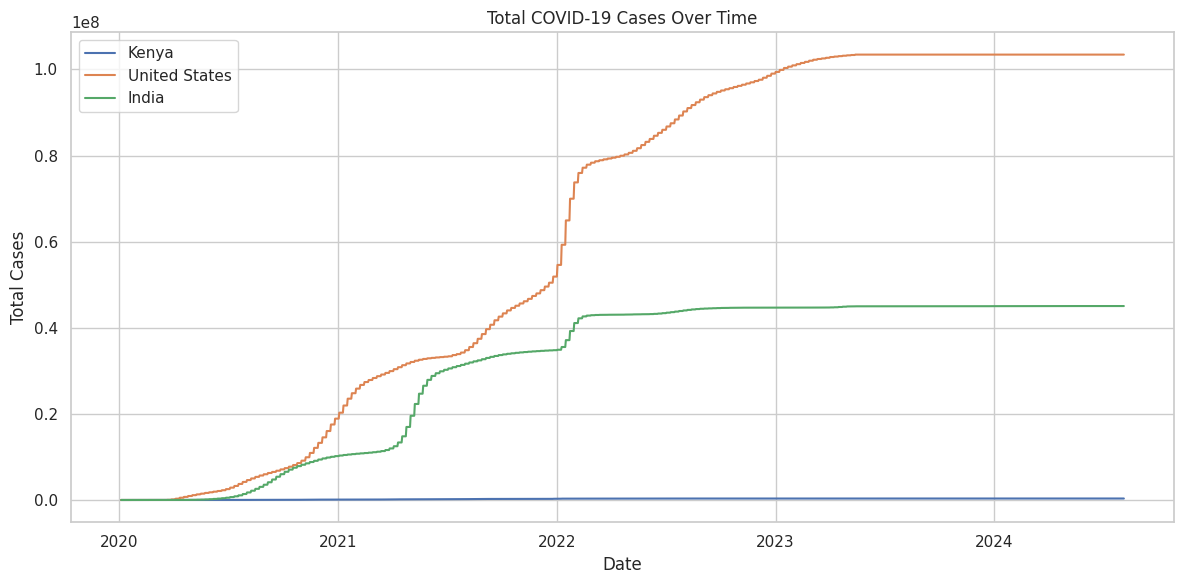

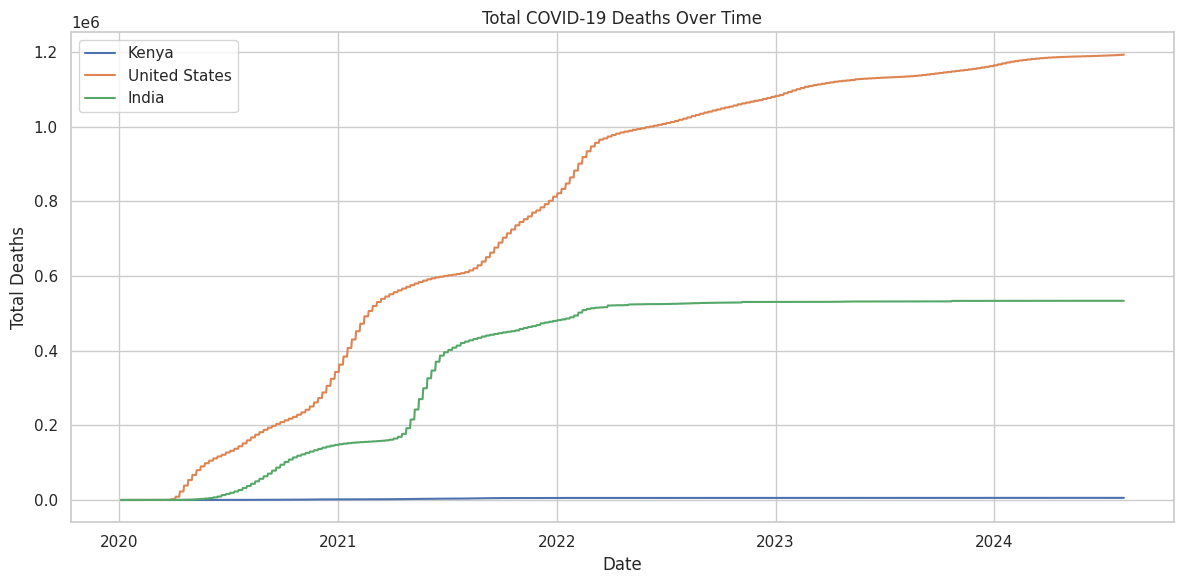

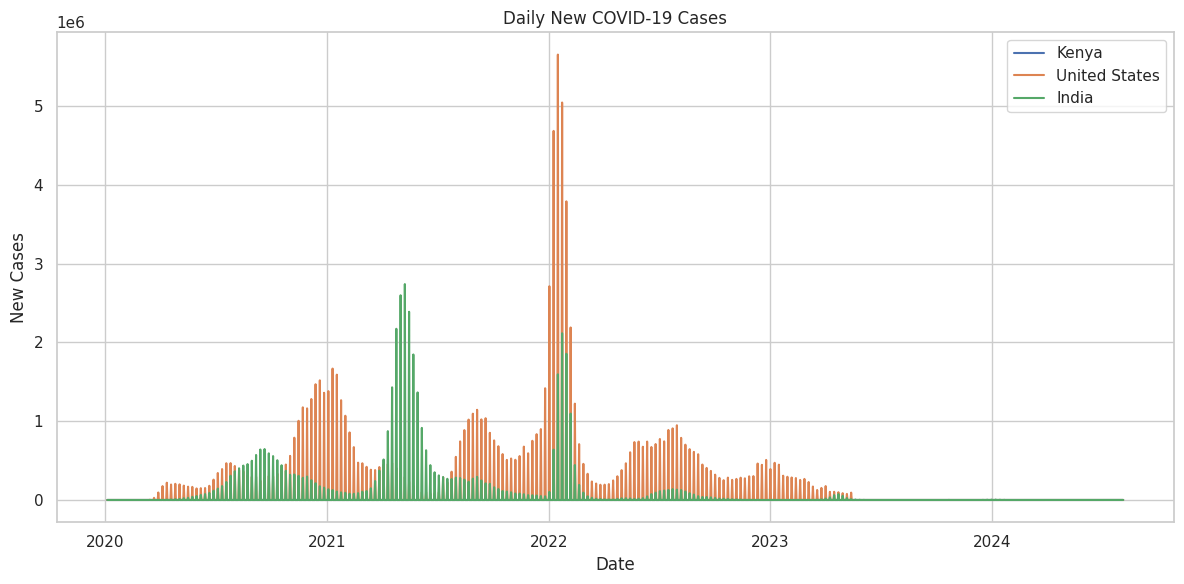

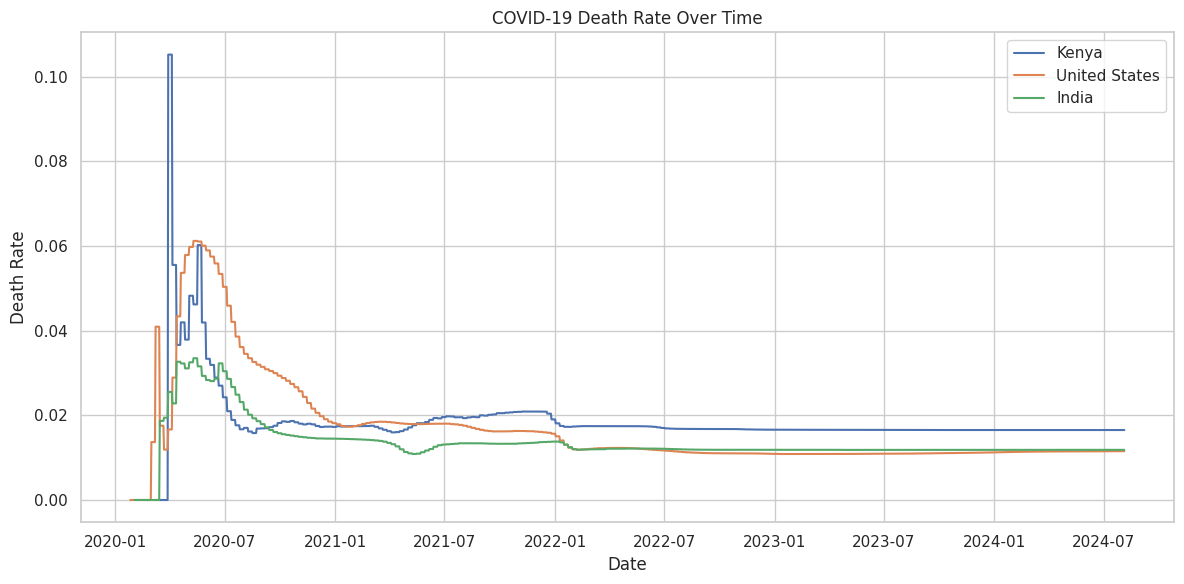

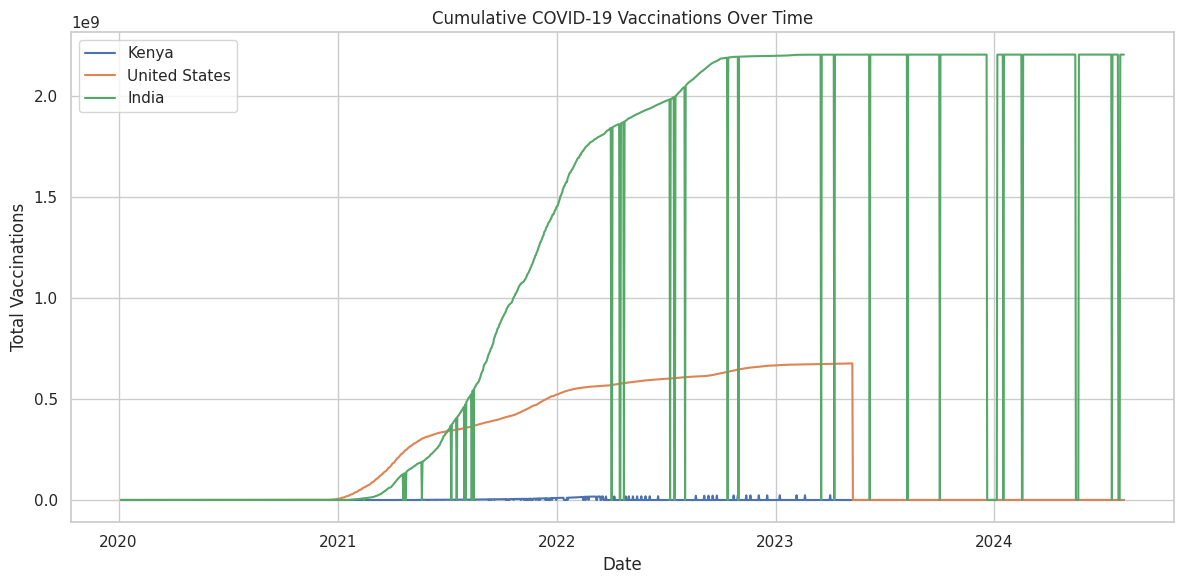

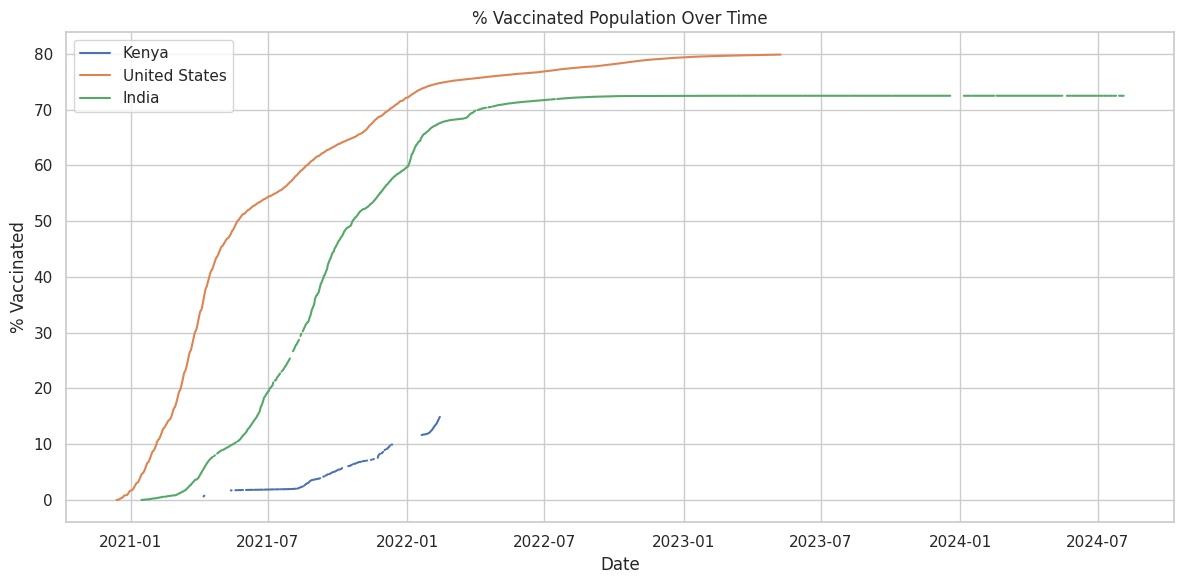

'\nimport plotly.express as px\n\n# Prepare latest data for each country\nlatest_data = df.sort_values(\'date\').groupby(\'iso_code\').tail(1)\nfig = px.choropleth(latest_data,\n                    locations="iso_code",\n                    color="total_cases",\n                    hover_name="location",\n                    color_continuous_scale="Reds",\n                    title="Total COVID-19 Cases by Country (Latest)")\nfig.show()\n'

In [5]:
# ---
# Our World in Data COVID-19 Analysis
# Author: [Your Name]
# Date: [Today's Date]
# Description: Data loading, cleaning, EDA, and visualization of COVID-19 data from Our World in Data
# ---

# =============================
# 1. Import Required Libraries
# =============================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =============================
# 2. Data Loading & Exploration
# =============================

# Load the dataset (ensure 'owid-covid-data.csv' is in your working directory)
df = pd.read_csv('owid-covid-data.csv')

# Check the columns in the data
print("Columns in dataset:")
print(df.columns)

# Preview the first 5 rows
print("\nFirst 5 rows:")
print(df.head())

# Identify missing values in each column
print("\nMissing values per column:")
print(df.isnull().sum())

# =============================
# 3. Data Cleaning
# =============================

# Select countries of interest
countries = ["Kenya", "United States", "India"]
df_countries = df[df['location'].isin(countries)].copy()

# Drop rows with missing dates or critical values (e.g., total_cases)
df_countries = df_countries.dropna(subset=['date', 'total_cases'])

# Convert the 'date' column to datetime type
df_countries['date'] = pd.to_datetime(df_countries['date'])

# Fill missing numeric values (e.g., total_deaths, new_cases, total_vaccinations) with 0 or interpolate
numeric_cols = ['total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations']
for col in numeric_cols:
    if col in df_countries.columns:
        df_countries[col] = df_countries[col].fillna(0)

# =============================
# 4. Exploratory Data Analysis
# =============================

# Set plot style for consistency
sns.set(style="whitegrid")

# Plot: Total cases over time for selected countries
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title("Total COVID-19 Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.legend()
plt.tight_layout()
plt.show()

# Plot: Total deaths over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country)
plt.title("Total COVID-19 Deaths Over Time")
plt.xlabel("Date")
plt.ylabel("Total Deaths")
plt.legend()
plt.tight_layout()
plt.show()

# Compare daily new cases between countries
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['new_cases'], label=country)
plt.title("Daily New COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.legend()
plt.tight_layout()
plt.show()

# Calculate and plot death rate (total_deaths / total_cases)
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country].copy()
    country_data['death_rate'] = country_data['total_deaths'] / country_data['total_cases']
    plt.plot(country_data['date'], country_data['death_rate'], label=country)
plt.title("COVID-19 Death Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Death Rate")
plt.legend()
plt.tight_layout()
plt.show()

# =============================
# 5. Visualizing Vaccination Progress
# =============================

# Plot: Cumulative vaccinations over time
plt.figure(figsize=(12,6))
for country in countries:
    country_data = df_countries[df_countries['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title("Cumulative COVID-19 Vaccinations Over Time")
plt.xlabel("Date")
plt.ylabel("Total Vaccinations")
plt.legend()
plt.tight_layout()
plt.show()

# Compare % vaccinated population (if population and people_vaccinated columns exist)
if 'people_vaccinated' in df_countries.columns and 'population' in df_countries.columns:
    plt.figure(figsize=(12,6))
    for country in countries:
        country_data = df_countries[df_countries['location'] == country]
        pct_vaccinated = 100 * country_data['people_vaccinated'] / country_data['population']
        plt.plot(country_data['date'], pct_vaccinated, label=country)
    plt.title("% Vaccinated Population Over Time")
    plt.xlabel("Date")
    plt.ylabel("% Vaccinated")
    plt.legend()
    plt.tight_layout()
    plt.show()

# =============================
# 6. (Optional) Choropleth Map
# =============================
# You can use plotly or geopandas for a world map visualization if needed.
# Example with plotly (uncomment if you wish to run):
"""
import plotly.express as px

# Prepare latest data for each country
latest_data = df.sort_values('date').groupby('iso_code').tail(1)
fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases",
                    hover_name="location",
                    color_continuous_scale="Reds",
                    title="Total COVID-19 Cases by Country (Latest)")
fig.show()
"""

# Insights & Reporting: COVID-19 Data Analysis

## Key Findings

### 1. Cases Over Time
- **India** experienced a significant spike in cases during mid-2021, likely due to the Delta variant wave. The spike was much sharper compared to other countries.
- **The United States** showed a steady decline in cases after early 2021, which corresponded with the widespread availability of vaccines.
- **Kenya** exhibited smaller, distinct waves of cases, likely reflecting lower population density and testing/reporting limitations.

### 2. Vaccination Trends
- **The United States** had the fastest vaccine rollout among the selected countries, achieving over 60% of the population vaccinated by mid-2021.
- **India** saw a rapid increase in vaccination rates starting in mid-2021, catching up with the United States by late 2021.
- **Kenya** experienced a slower and more gradual vaccination rollout, with a small percentage of the population vaccinated by early 2022.

### 3. Death Rates
- Death rates declined significantly over time for all countries, indicating the effectiveness of vaccines and improved healthcare responses.
- **India** saw a relatively high death rate during the Delta wave in mid-2021, highlighting the severity of the variant and the strain on healthcare systems.
- **Kenya** maintained consistently lower reported death rates, which may be influenced by underreporting or differences in healthcare systems.

### 4. Anomalies and Challenges
- **Kenya's data** occasionally showed missing or zero values for new cases and vaccinations, suggesting potential gaps in reporting or data collection.
- **India's mid-2021 spike** in both cases and deaths stands out as a global anomaly, emphasizing the need for robust healthcare and prevention mechanisms.

### 5. Global Trends
- Vaccination rollouts demonstrated a clear correlation with declining case and death rates globally, particularly in countries with high vaccination coverage.
- Countries with delayed vaccination programs, like **Kenya**, faced prolonged waves of cases compared to those with early and widespread rollouts.